# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [229]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# libraries for reading and manipulation of data

import pandas as pd
import numpy as np

# library for split data
from sklearn.model_selection import train_test_split

# libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Importing data

In [230]:
# read the data file
data = pd.read_csv("ExtraaLearn.csv")

# create a copy to avoid changes in the original data
data_copy = data.copy()

## Data Overview

- Observations
- Sanity checks

In [231]:
# Check the top 5 observations
data_copy.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [232]:
# Check the last 5 observations
data_copy.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [233]:
# shape of the data
rows, columns = data_copy.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4612
Number of columns: 15


In [234]:
# concise description of the dataset
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [235]:
# check for duplicates in the dataset
duplicates = data_copy.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [236]:
print("Dataset statistical summary:")
data_copy.describe().T

Dataset statistical summary:


,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


- mean and median of website visits are very close to each other
- Time spent on website has some outliers ar the right end as the 75th percentile is 1337 and max is 2537
- Page Views per visit has some outliers ar the right end as the 75th percentile is around 4  and max is 18

In [237]:
# checking the number of unique values
data_copy["ID"].nunique()

4612

We drop the ID column as it is not relevant for the purposes of analysis

In [238]:
data_copy.drop(["ID"], axis = 1, inplace = True)

## devide according to numerical or categorical columns

In [239]:
# Making a list of all catrgorical variables
cat_col = ["current_occupation","first_interaction","profile_completed", "last_activity", "print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]

num_col = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit", "status"]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

### Univariate Analysis

In [240]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [241]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Age analysis

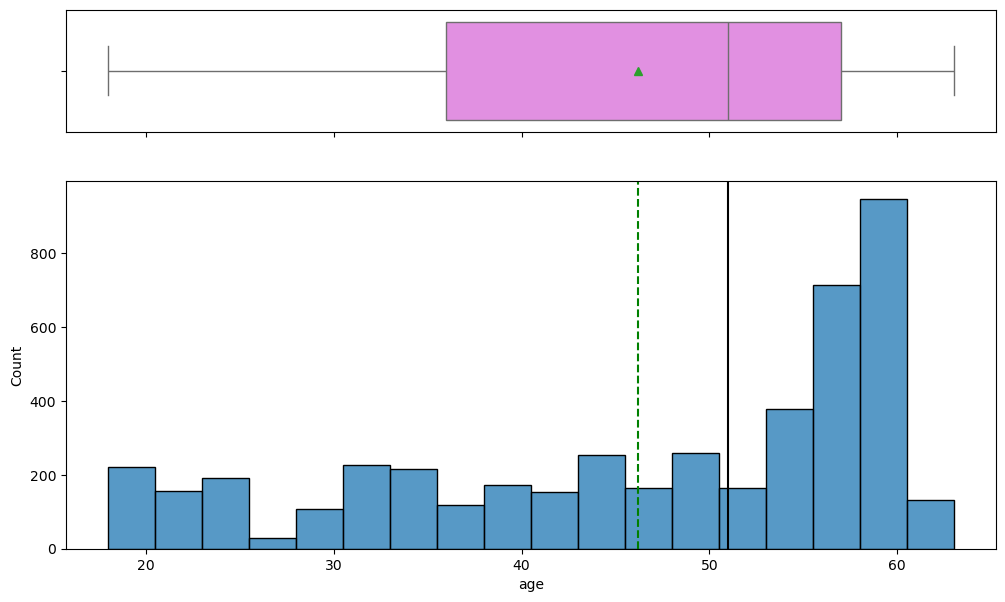

In [242]:
histogram_boxplot(data_copy, "age") 

- Average age of people converting to paid customers is above 45 years old
- Age can be an important variable while targeting customers. We will further explore this in bivariate analysis.
- It is negatively skewed

#### Website visits analysis

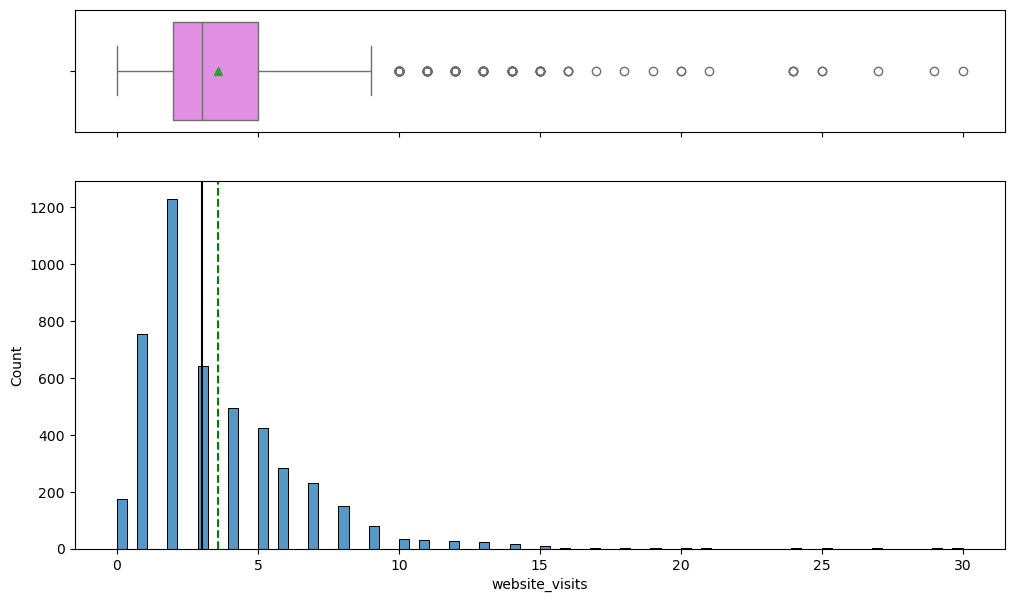

In [243]:
histogram_boxplot(data_copy, "website_visits") 

- Majority of the people visit atleast twice
- with a average website visit between 3 and 4 times
- it is poisitively skewed
- There are quite a few outliers

In [244]:
# To check how many leads have not visited web-site
data_copy[data_copy["website_visits"] == 0].shape

(174, 14)

#### Time spend on Website analysis

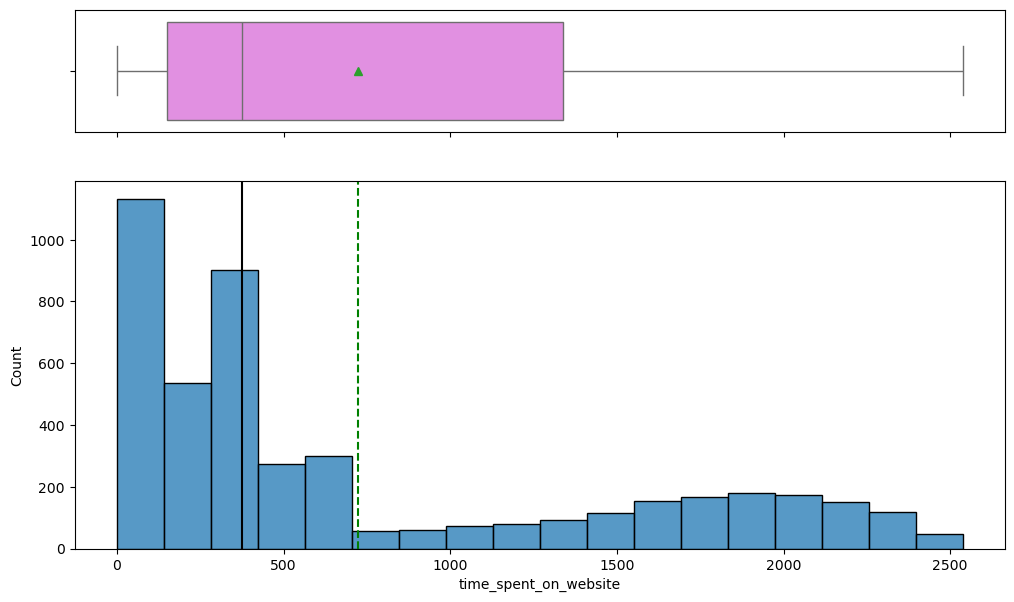

In [245]:
histogram_boxplot(data_copy, "time_spent_on_website") 

- Positively skewed,
- with mean greater than 500

#### Page Views per Visit Analysis


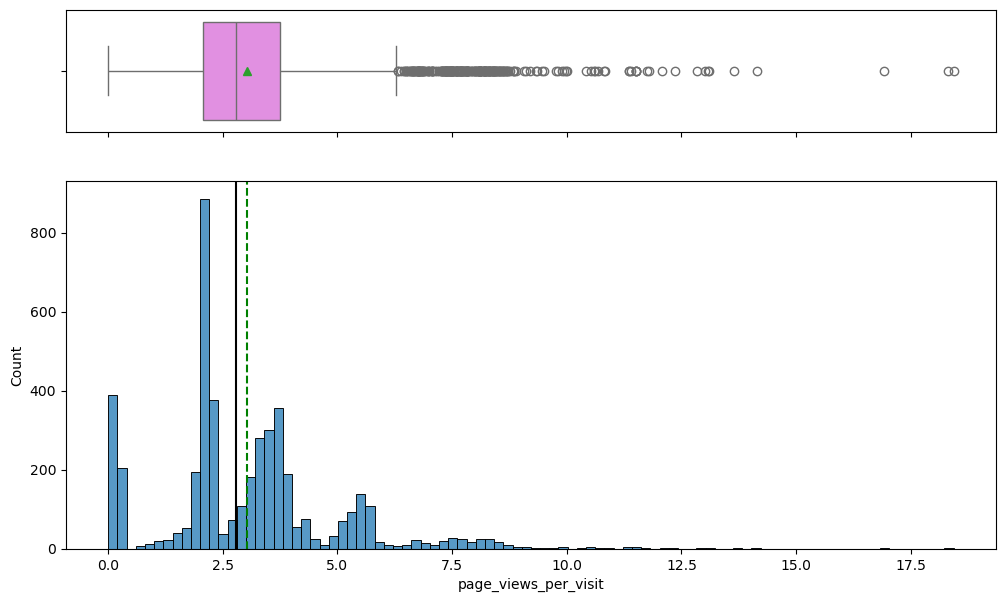

In [246]:
histogram_boxplot(data_copy, "page_views_per_visit") 

- Large number of outliers
- 

#### Current Occupation Analysis

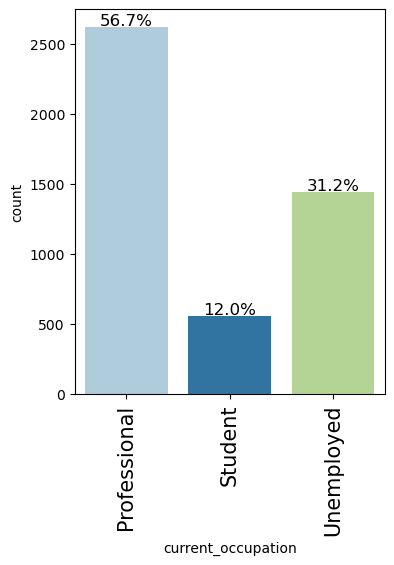

In [247]:
labeled_barplot(data_copy, "current_occupation", perc=True)

#### First Interaction Analysis 

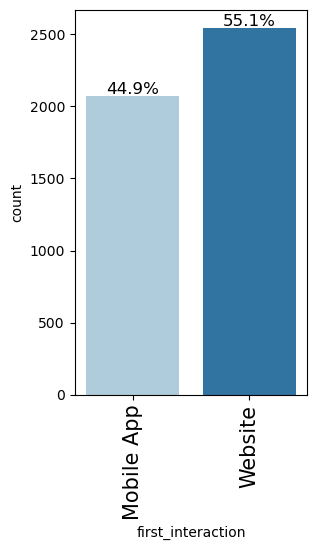

In [248]:
labeled_barplot(data_copy, "first_interaction", perc=True)

#### Profile Completed Analysis

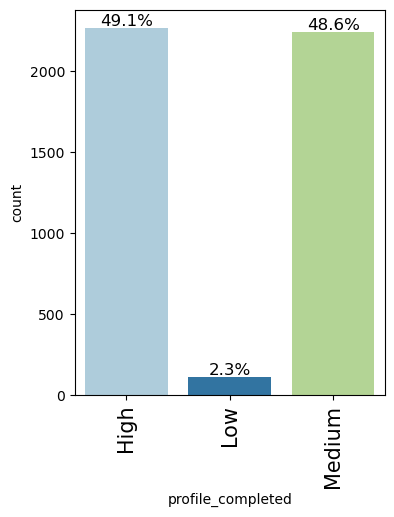

In [249]:
labeled_barplot(data_copy, "profile_completed", perc=True)

#### Last Activity Analysis

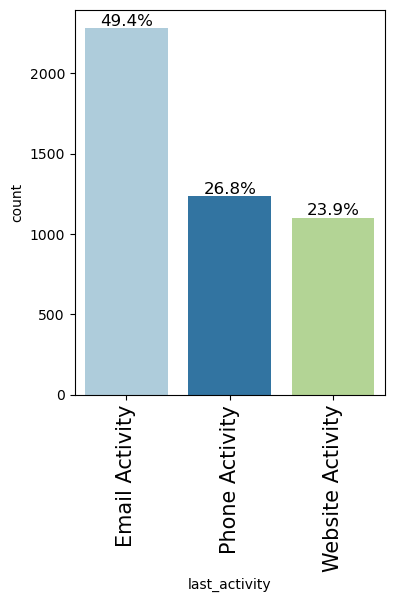

In [250]:
labeled_barplot(data_copy, "last_activity", perc=True)

#### Print Media Type 1 Analysis

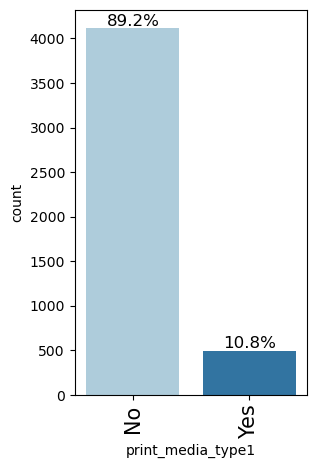

In [251]:
labeled_barplot(data_copy, "print_media_type1", perc=True)

#### Print Media Type 2 Analysis

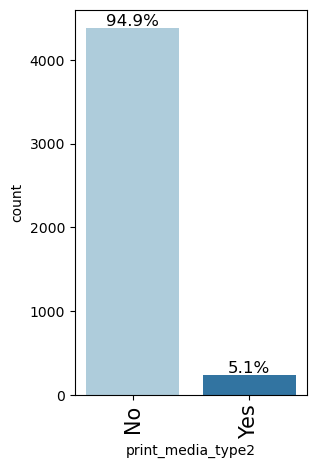

In [252]:
labeled_barplot(data_copy, "print_media_type2", perc=True)

#### Digitial Media Analysis

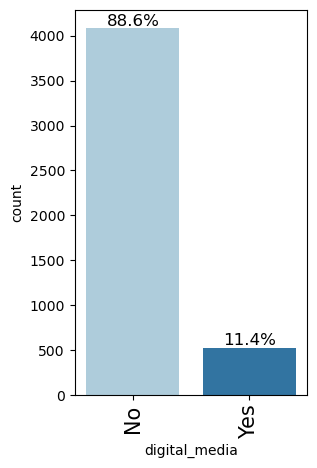

In [253]:
labeled_barplot(data_copy, "digital_media", perc=True)

#### Educational Channels Analysis

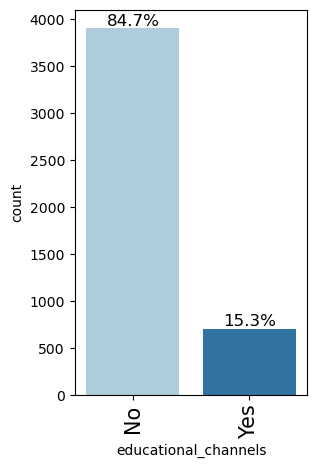

In [254]:
labeled_barplot(data_copy, "educational_channels", perc=True)

#### Referral Analysis

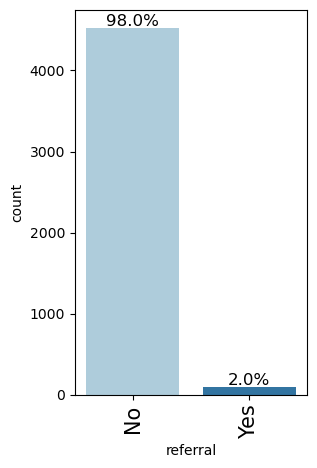

In [255]:
labeled_barplot(data_copy, "referral", perc=True)

#### Status Analysis

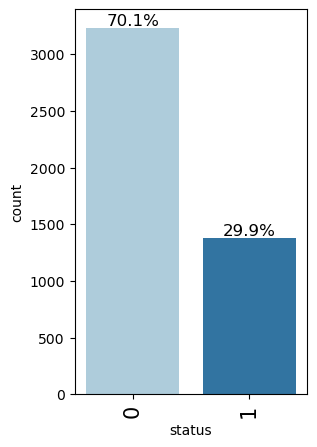

In [256]:
labeled_barplot(data_copy, "status", perc=True)

### Bivariate Analysis

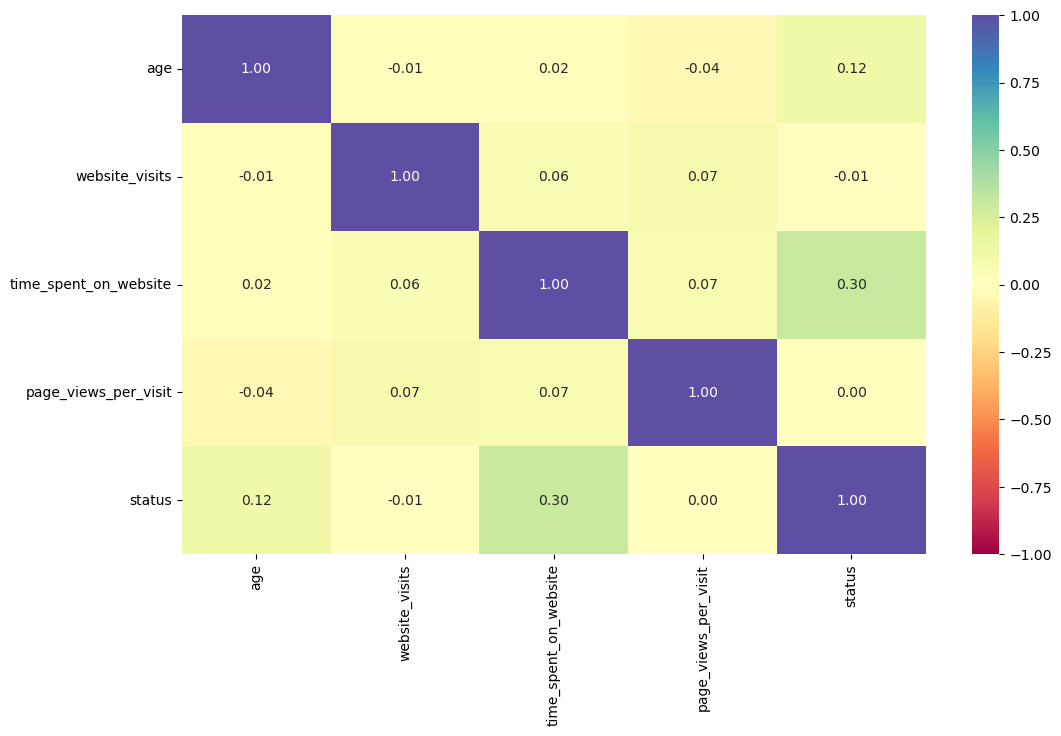

In [257]:
cols_list = data_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [258]:
# FUNCTION TO HELP IN VISUAL ANALYSIS
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [259]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Q- Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

**Analysing the role of current occupation with  the outcome of the course to get leads**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


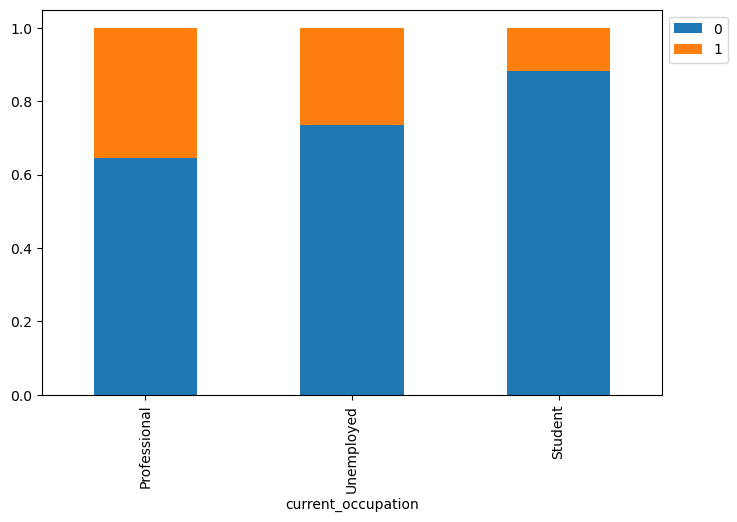

In [260]:
stacked_barplot(data_copy, "current_occupation", "status")

**Analysisg Age as a factor to obtain leads**

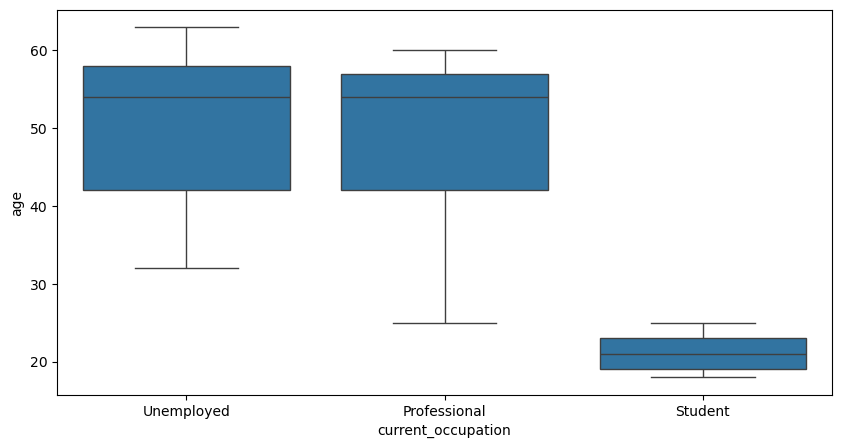

In [261]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data_copy, x = data_copy["current_occupation"], y = data_copy["age"])
plt.show()

In [262]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Leads should have a strong and convincing first impression from the business.** 

Q- The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?  

**Let's examine whether the initial interaction's channels affect lead conversion**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


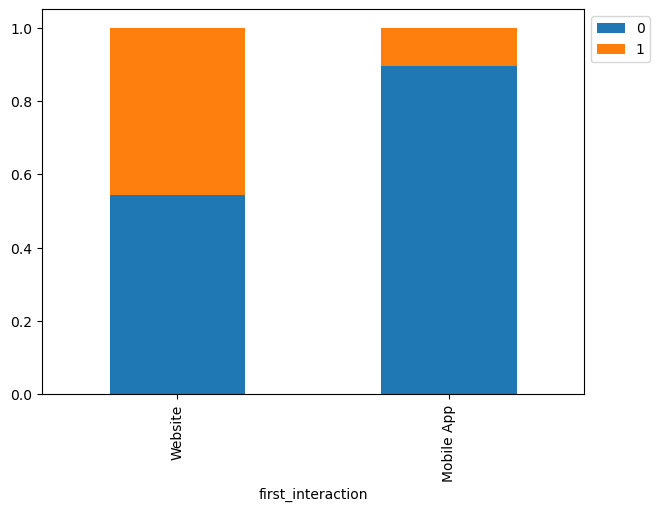

In [263]:
stacked_barplot(data_copy, "first_interaction", "status")

Q -  The company uses multiple modes to interact with prospects. Which way of interaction works best? 

analysis of different prospect interaction

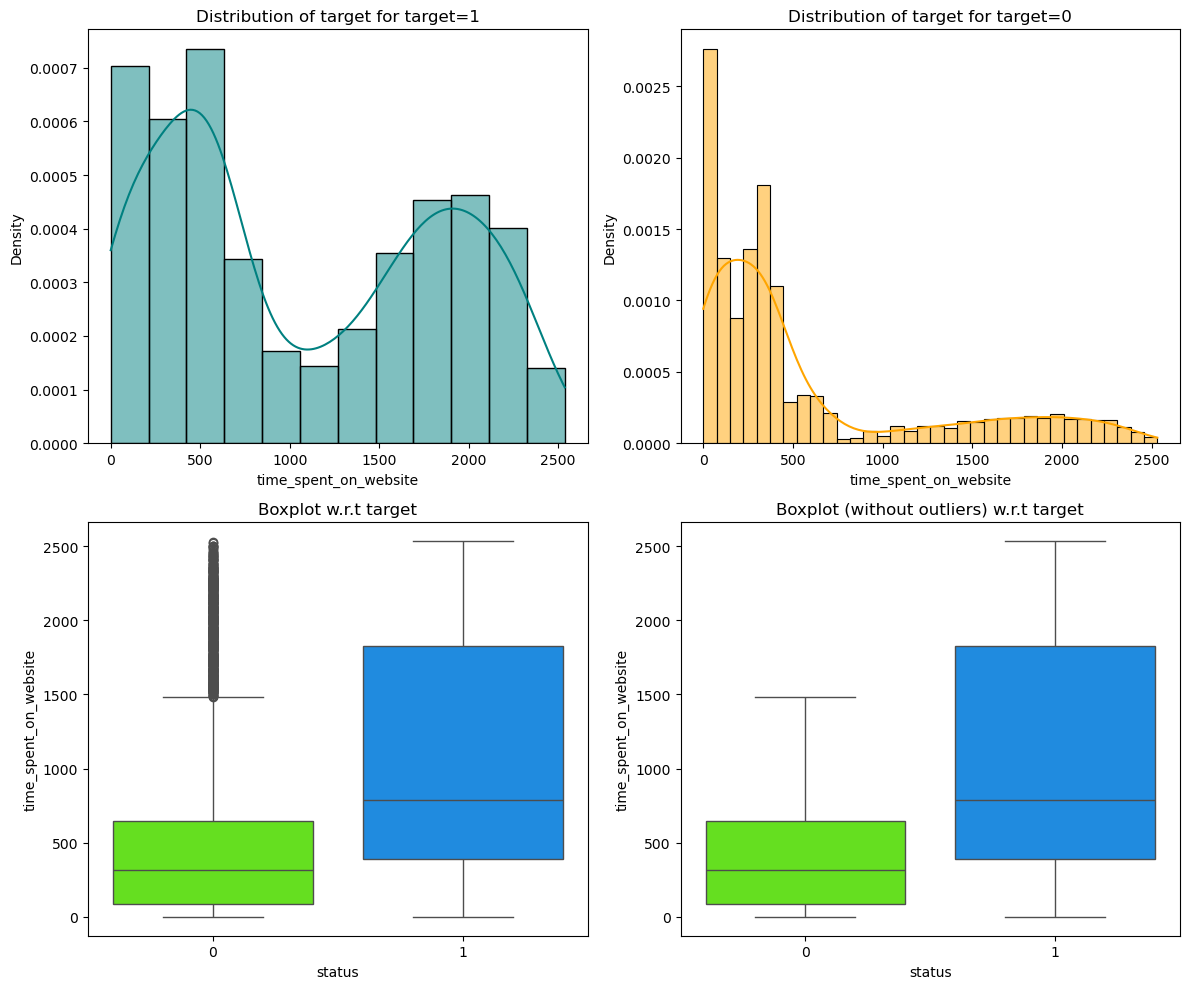

In [264]:
distribution_plot_wrt_target(data_copy, "time_spent_on_website", "status")

In [265]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Let's perform a comparable study for page views per visit and time spent on the website.**

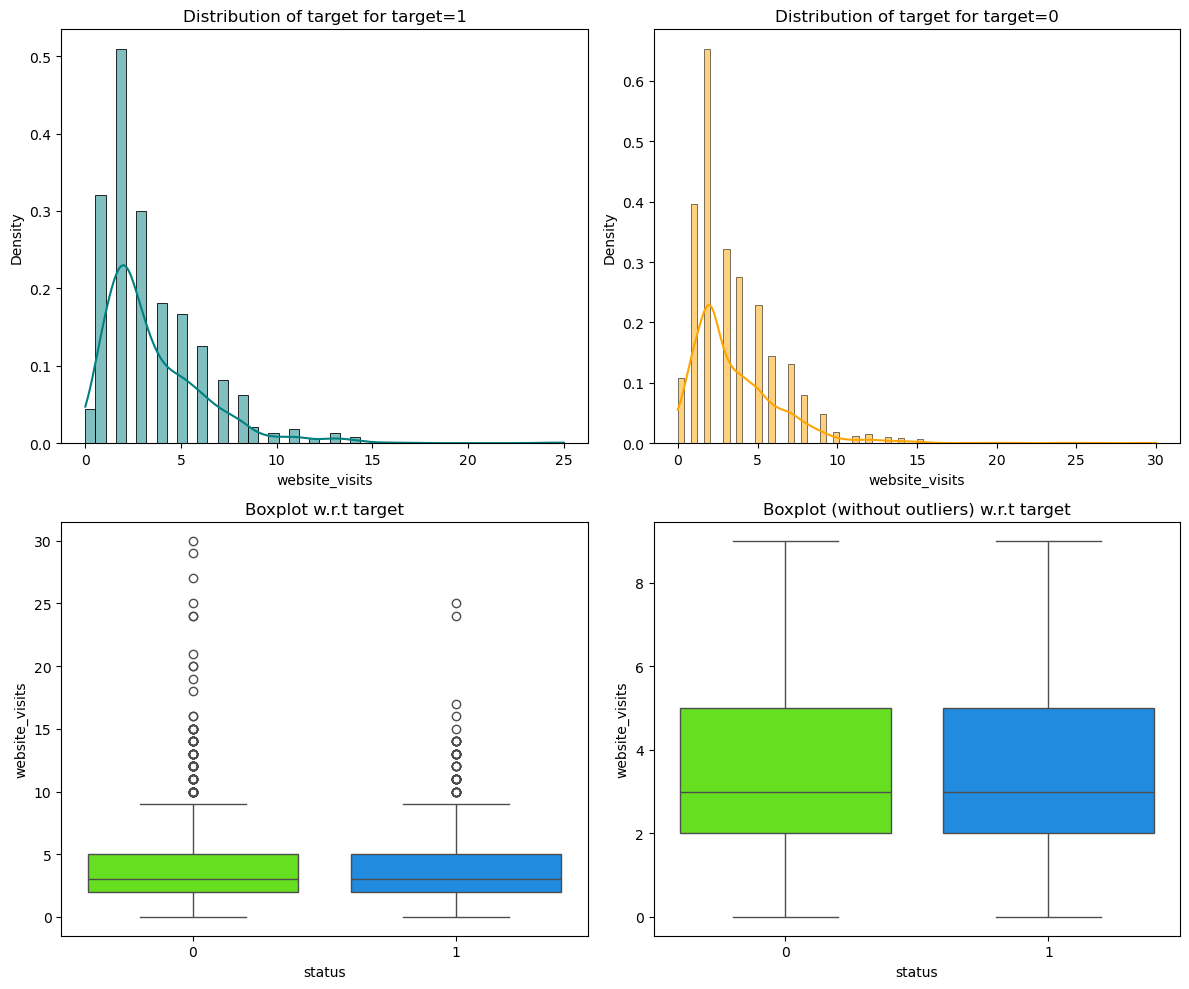

In [266]:
distribution_plot_wrt_target(data_copy,"website_visits","status")

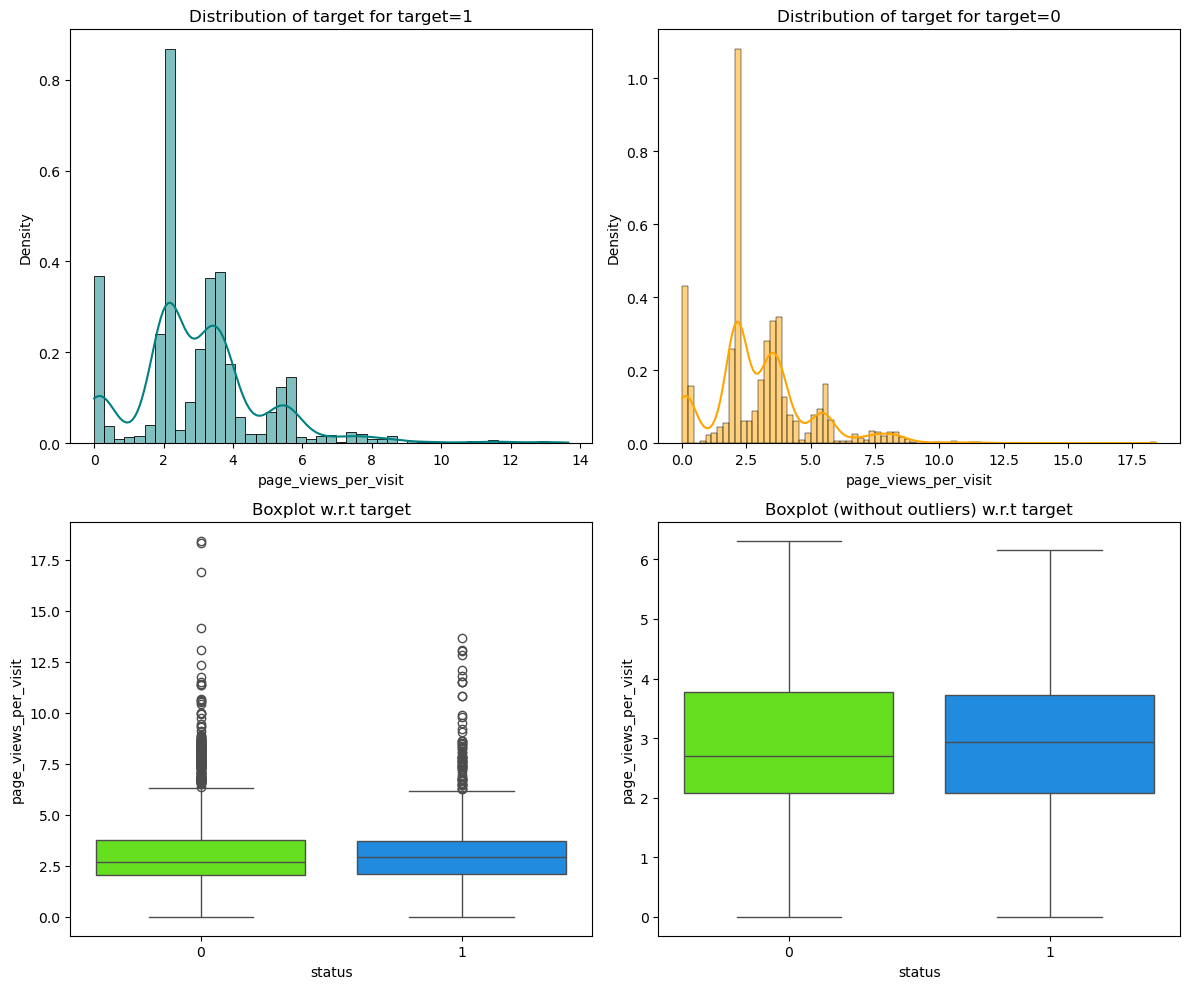

In [267]:
distribution_plot_wrt_target(data_copy,"page_views_per_visit","status")

**In most cases, users of the mobile app or website must first create a profile by providing personal information before they can access additional information. Let's examine whether the degree of profile completeness affects the status of leads.**

Q - People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


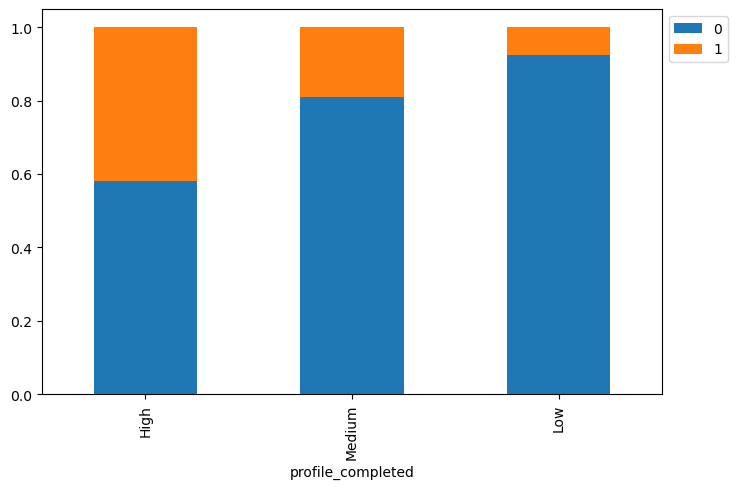

In [268]:
stacked_barplot(data_copy,"profile_completed","status")

**In most cases, users of the mobile app or website must first create a profile by providing personal information before they can access additional information. Let's examine whether the degree of profile completeness affects the status of leads.**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


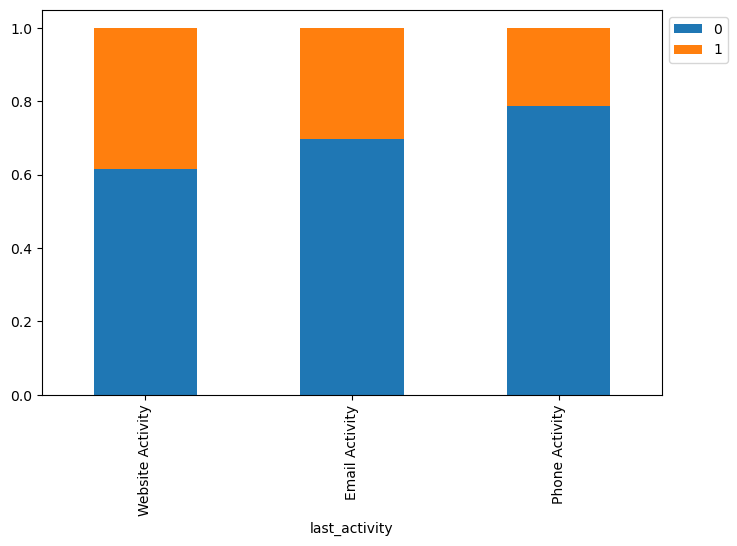

In [269]:
stacked_barplot(data_copy,"last_activity","status")

Q- The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

**Let's observe how the lead status is affected by advertisements and referrals**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


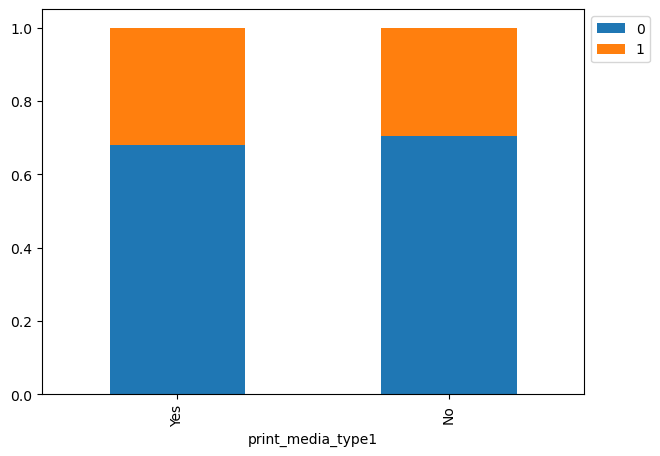

In [270]:
stacked_barplot(data_copy,"print_media_type1","status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


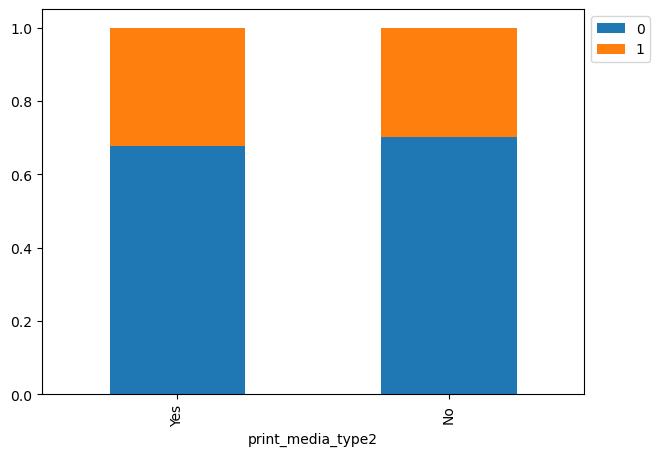

In [271]:
stacked_barplot(data_copy,"print_media_type2","status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


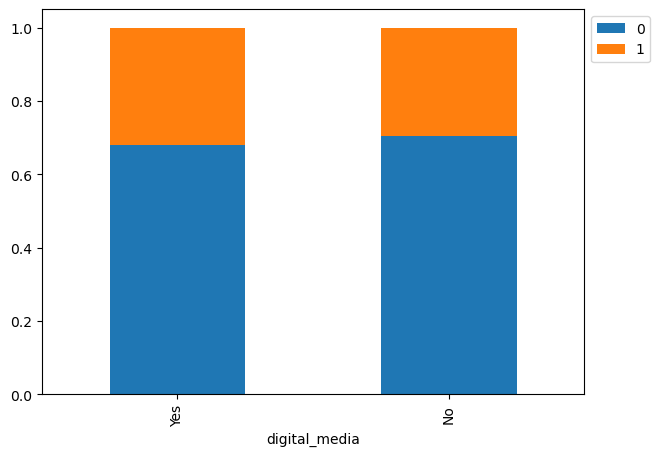

In [272]:
stacked_barplot(data_copy,"digital_media","status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


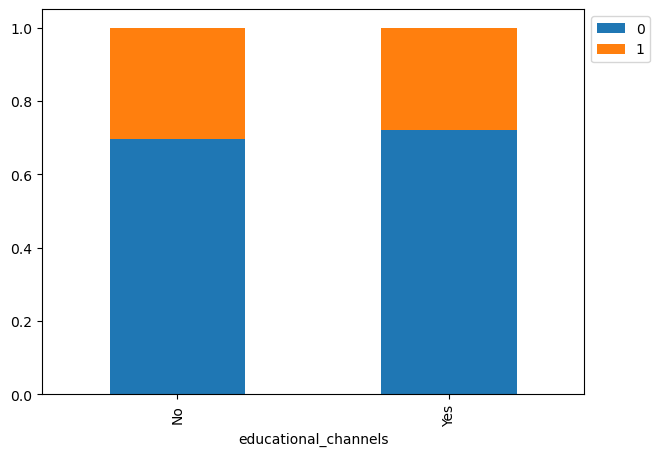

In [273]:
stacked_barplot(data_copy,"educational_channels","status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


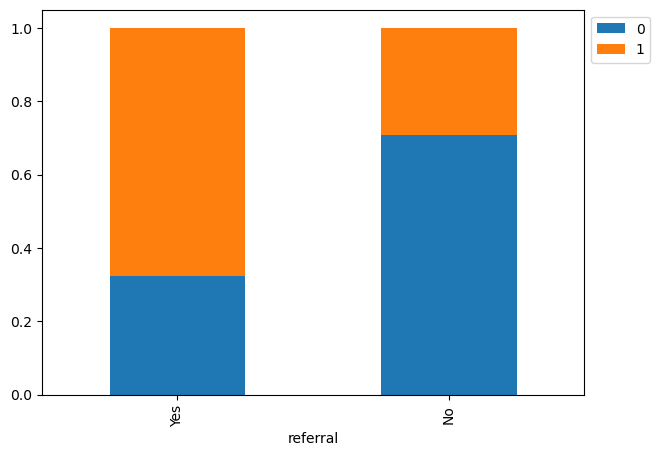

In [274]:
stacked_barplot(data_copy,"referral","status")

### OBSERVATION FROM EDA

1. **First_Interaction** : Number of leads approached via Website were more compared to the Mobile App.
2. **Profile completion** : 90% of the data(leads) were completed their profile either Medium or High.
3. **Last_Interaction**: The last interaction ended between the lead and ExtraaLearn is mostly by email (50%) when compared to Phone and Website.
4. **ExtraaLearn Ad reach** : ExtraaLearn commercials have been more popular in either Newspaper (PrintMedia1) - 12.5% or Digital media - 12.5% when compared to Magazine(PrintMedia2) which is relatively less i.e. ~ < 5%.
5. **Educational Channels**: Extraalearn was able to reach through some education channels like online forums , discussion threads & educational websites < 15%

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Answers for above (Bivariant analysis) : 

1. Students were the most prominent category which showing interest towards the Extraalearn compared to Professional. Where Unemployed is the least category compared to other two i.e. Student & Professional. 
2. Websites having more impact than the Mobile App when it comes to the First Interaction. 
3. 84% of the prospects became leads via Website interaction and other 16% were through Mobile App. 
4. Compared to all three mediums Newspaper is having a better conversion rate compared to Magazines or Digital Media. 
5. Profile completion playing a quiet significant role interms of converting the prospects into leads whereas we see 68% of Fully completed porspects did convert into leads , compared to Medium which is having conversion rate of 30% & Low with conversion rate < 1%.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Checking missing values

In [275]:
# CHECKING MISSING VALUES
data_copy.isnull().sum()
# data_copy.isnull().values.any()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

There are no missing values in the dataset

## Outlier Checks

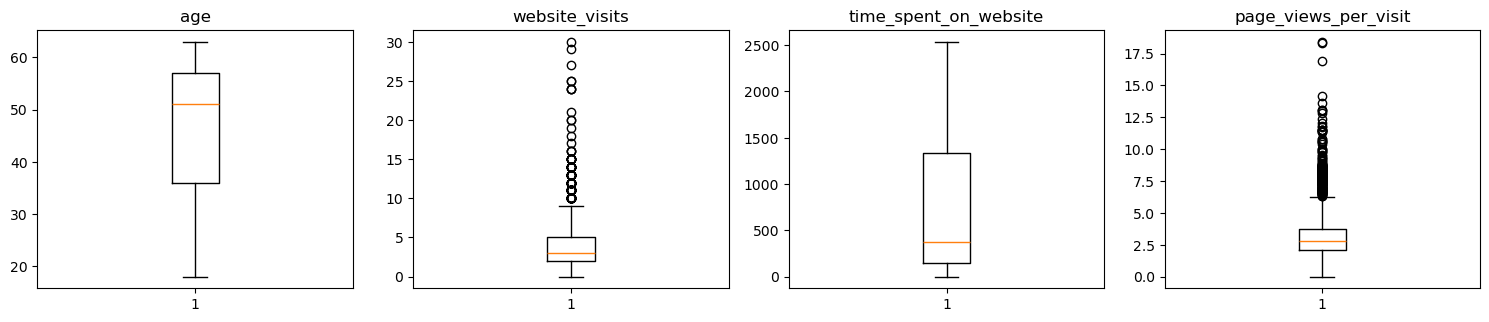

In [276]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preparation 

In [277]:
X = data_copy.drop(["status"], axis=1)
Y = data_copy["status"] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [278]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## Building a Decision Tree model

In [285]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [286]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

using training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



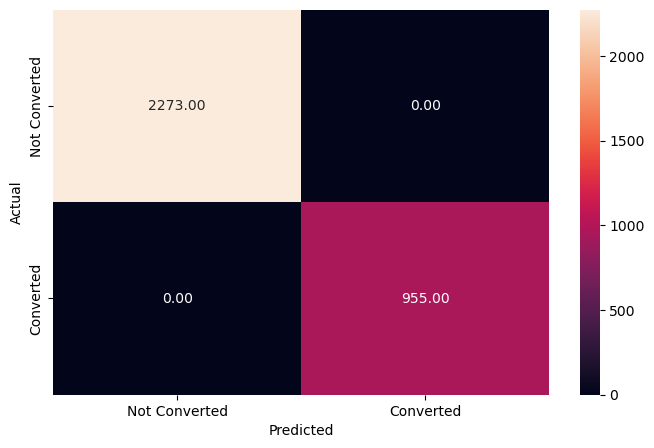

In [290]:
y_pred_train1 = decision_tree.predict(X_train)
metrics_score(y_train,y_pred_train1)

using testing data

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



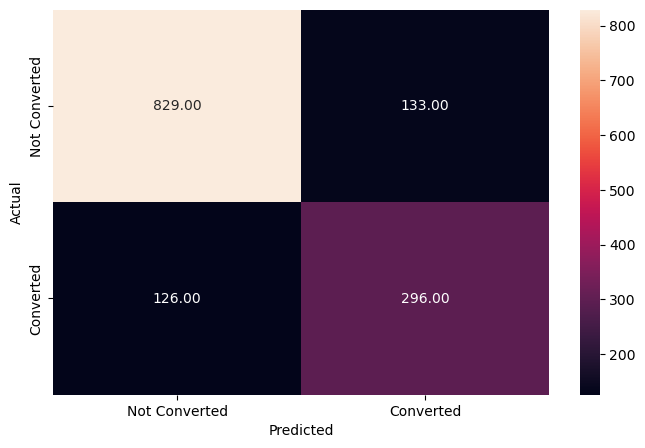

In [291]:
y_pred_test1 = decision_tree.predict(X_test)
metrics_score(y_test,y_pred_test1)

#### Tuning Hyperparameters


In [292]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



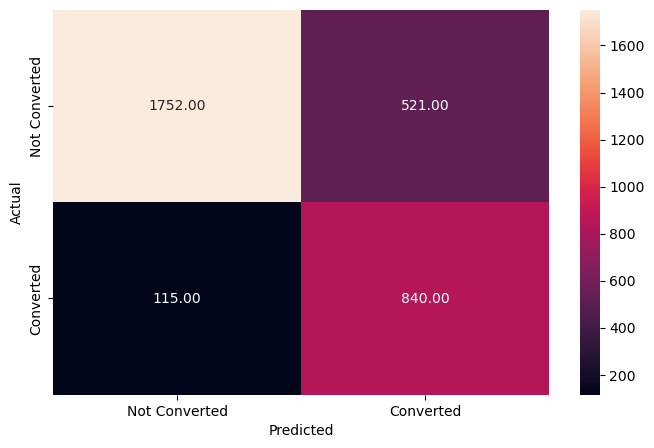

In [293]:
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



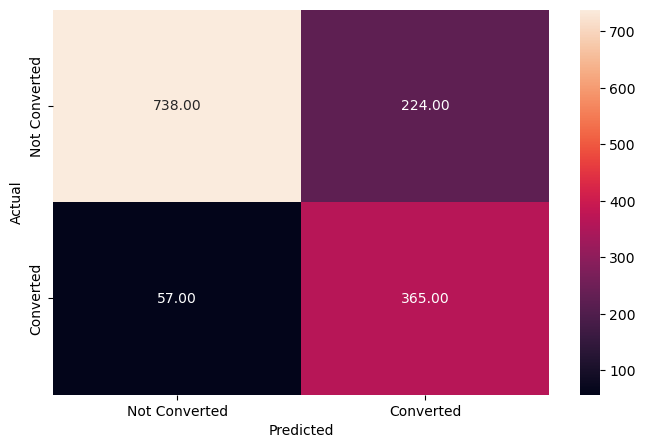

In [294]:
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

#### Visualize the tree

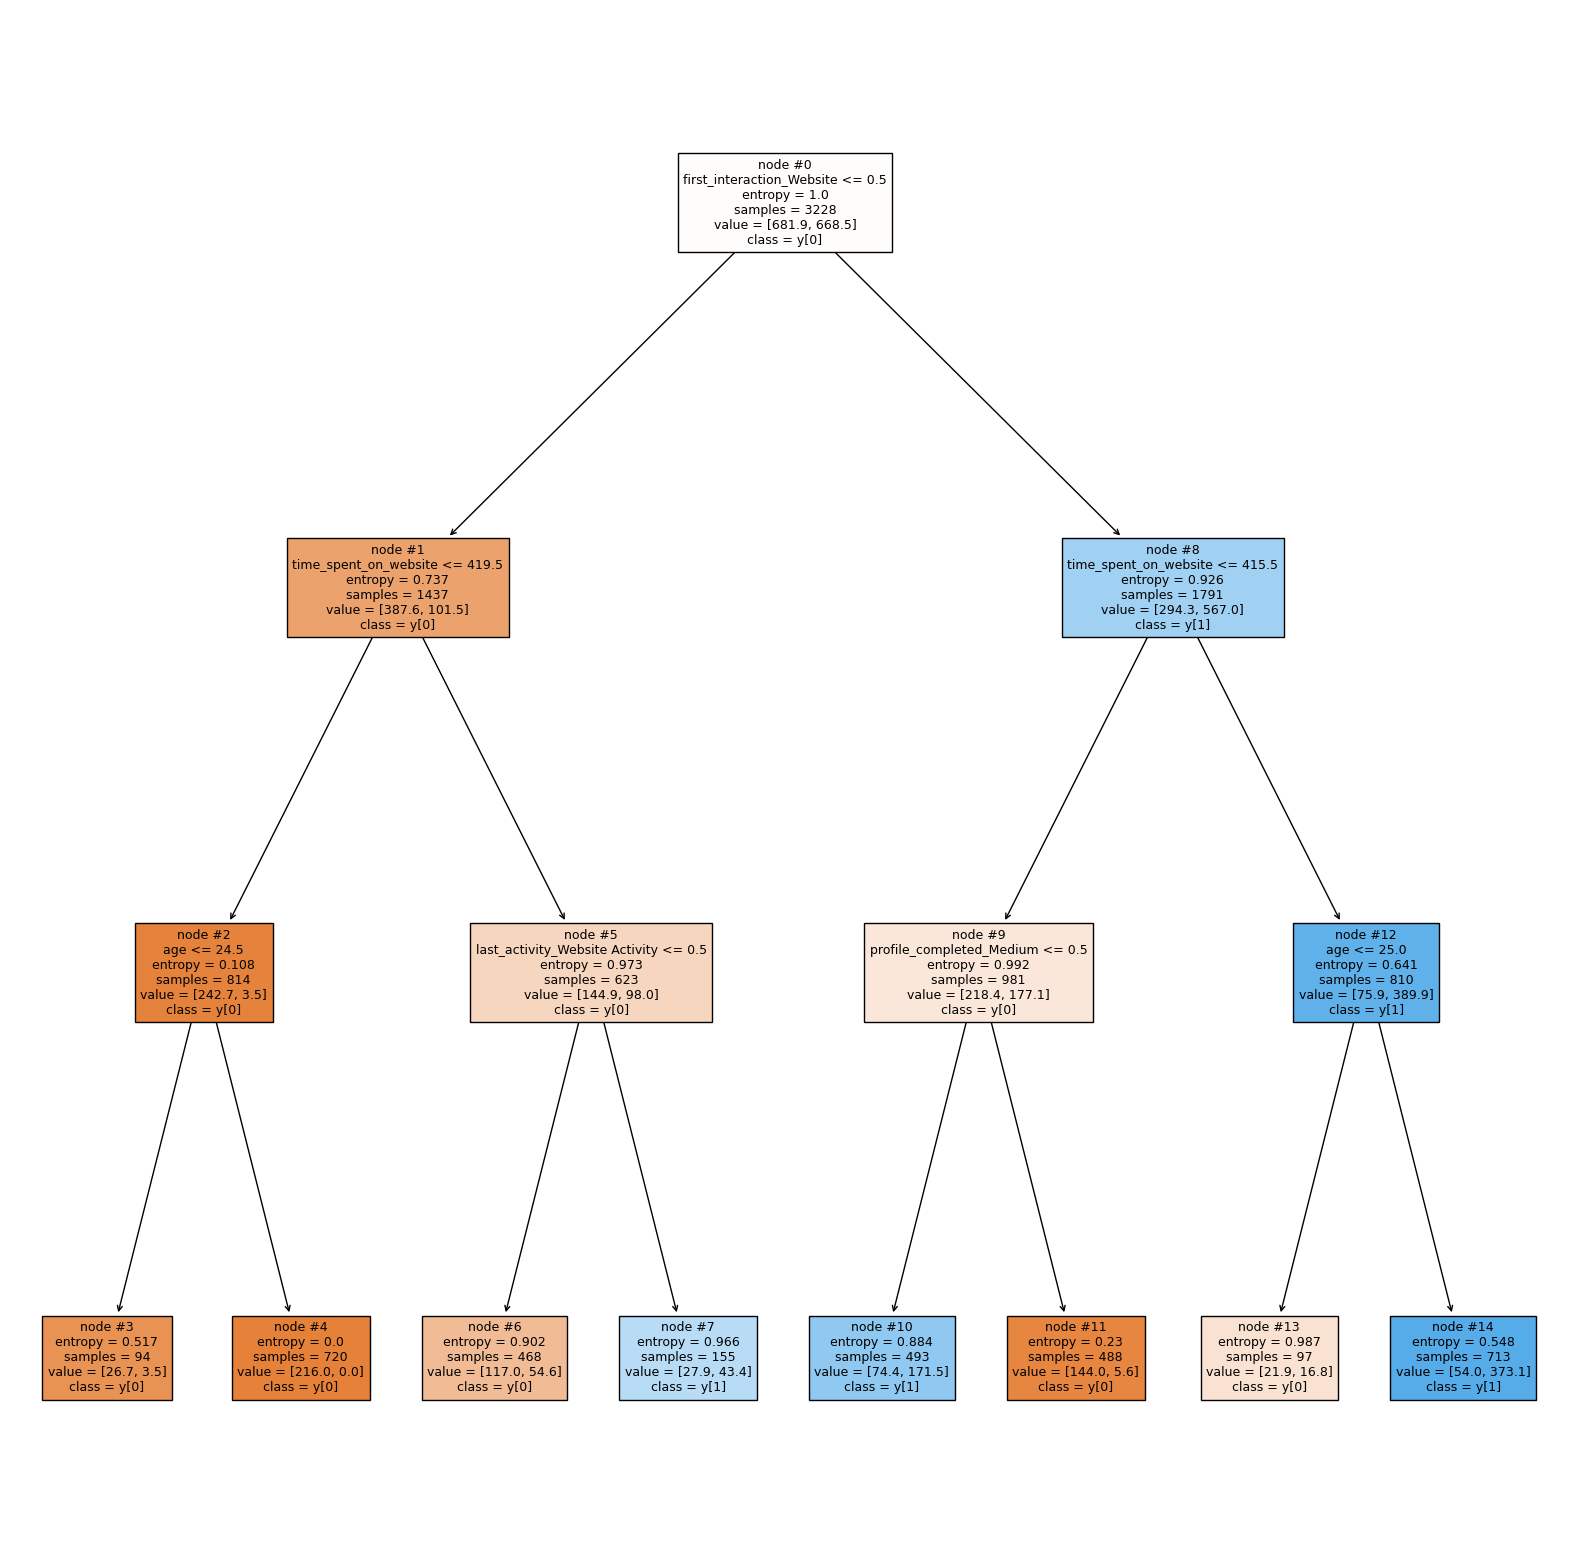

In [295]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [296]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


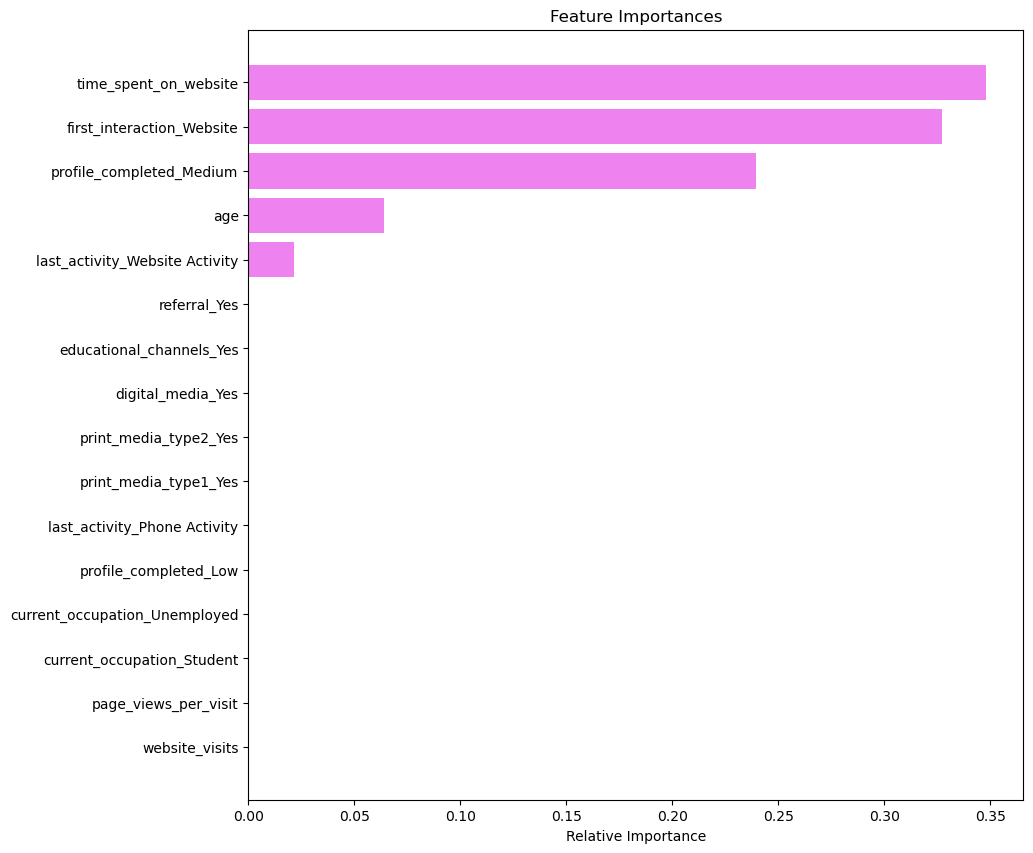

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Importance of features majorly affecting the result of the prediction

## Do we need to prune the tree?

Tesing on the training data post pruning, (Pre pruning results remain the same as above)

Best Alpha for pruning: 0.0010165651538827994
Train Accuracy (Post-pruned): 0.8785625774473358
Test Accuracy (Post-pruned): 0.8670520231213873
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       962
           1       0.84      0.70      0.76       422

    accuracy                           0.87      1384
   macro avg       0.86      0.82      0.84      1384
weighted avg       0.87      0.87      0.86      1384



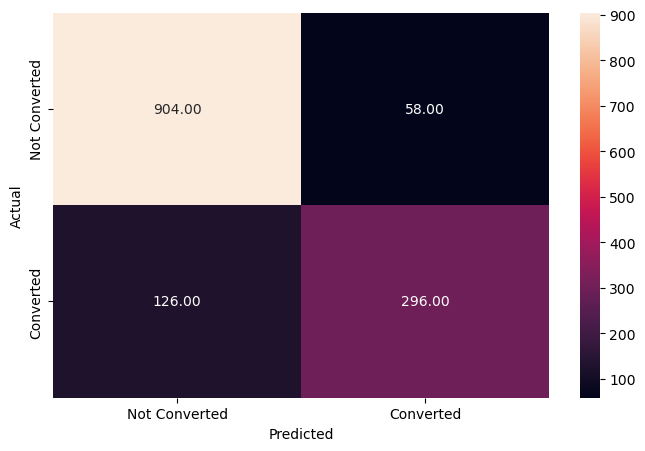

In [301]:
# Fit a large decision tree (no pruning)
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

# Get the effective alpha values for pruning
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
# print(f"Pruning Path: {ccp_alphas}")

# Train trees for each value of alpha (post-pruning)
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Evaluate performance for each tree
train_scores = [accuracy_score(y_train, tree.predict(X_train)) for tree in trees]
test_scores = [accuracy_score(y_test, tree.predict(X_test)) for tree in trees]

# Find the best tree based on test accuracy
best_alpha_index = test_scores.index(max(test_scores))
best_tree = trees[best_alpha_index]
best_ccp_alpha = ccp_alphas[best_alpha_index]

print(f"Best Alpha for pruning: {best_ccp_alpha}")
print(f"Train Accuracy (Post-pruned): {train_scores[best_alpha_index]}")
print(f"Test Accuracy (Post-pruned): {test_scores[best_alpha_index]}")

# Print the classification report and confusion matrix for the best post-pruned tree
y_pred_test_post_pruned = best_tree.predict(X_test)
metrics_score(y_test, y_pred_test_post_pruned)

## Building a Random Forest model

In [302]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

using training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



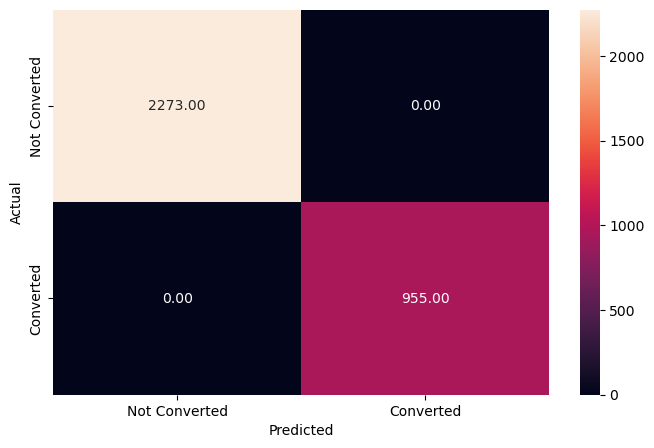

In [304]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train,y_pred_train_rf)

using testing data

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



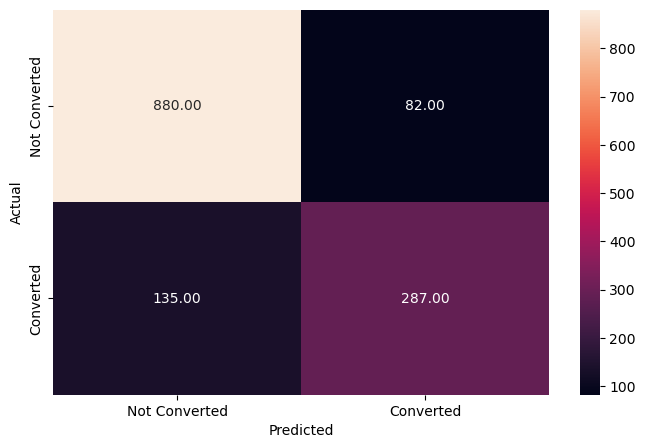

In [305]:
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test,y_pred_test_rf)

#### Tuning hyperparameters

In [306]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

using training data on tuned random forest

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



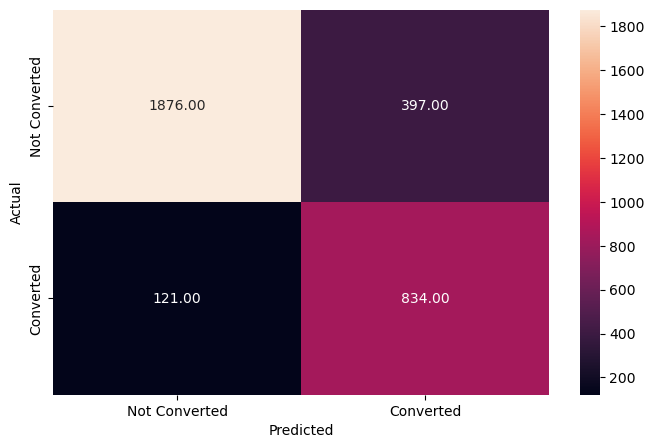

In [308]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train,y_pred_train_rf_tuned)

using testing data on tuned random forest

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



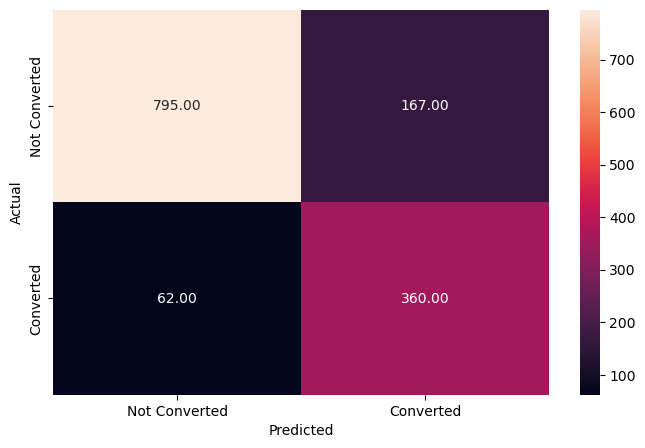

In [309]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test,y_pred_test_rf_tuned)

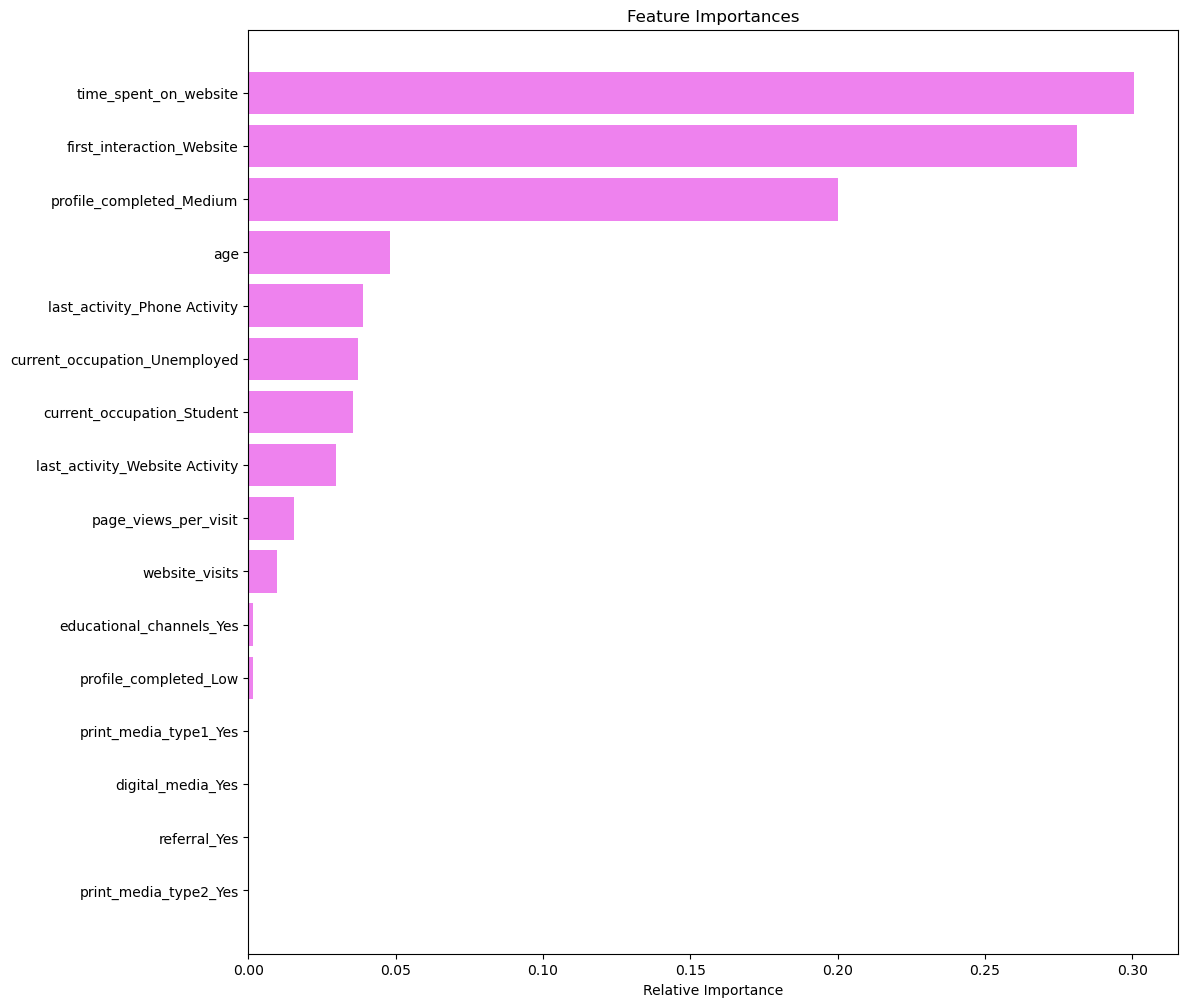

In [310]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Importance of features according to random forest which affect the result more severly

## Do we need to prune the tree?

Train Accuracy (Pruned Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2273
           1       0.85      0.76      0.80       955

    accuracy                           0.89      3228
   macro avg       0.88      0.85      0.86      3228
weighted avg       0.89      0.89      0.89      3228



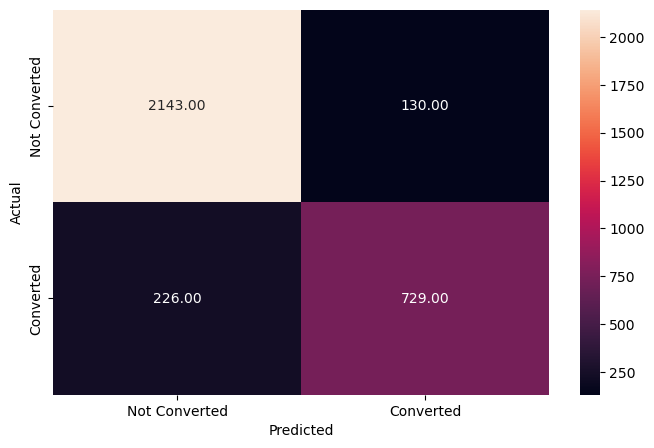

Test Accuracy (Pruned Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.80      0.71      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.85      0.86      0.85      1384



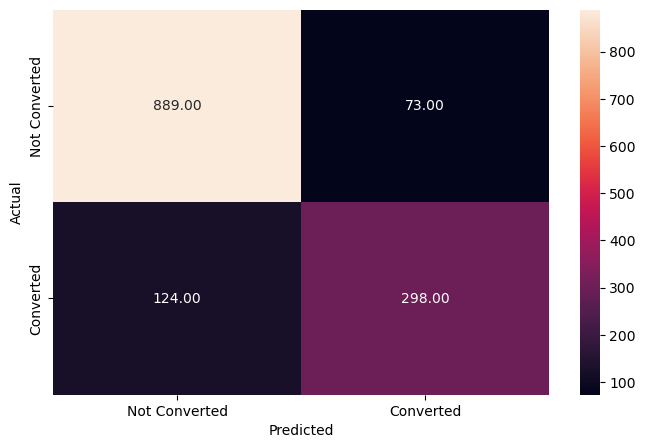

In [311]:
# Prune the Random Forest by setting hyperparameters
rf_estimator_pruned = RandomForestClassifier(
    random_state=1, 
    max_depth=10,              # Limit the maximum depth of the trees
    min_samples_split=10,      # Minimum samples required to split a node
    min_samples_leaf=5,        # Minimum samples required at a leaf node
    max_features='sqrt',       # Number of features to consider for each split (sqrt usually works well)
    n_estimators=100          # Number of trees (you can experiment with this)
)

# Train the pruned Random Forest model
rf_estimator_pruned.fit(X_train, y_train)

# Make predictions
y_pred_train_rf_pruned = rf_estimator_pruned.predict(X_train)

# Print the classification report and confusion matrix
print("Train Accuracy (Pruned Random Forest):")
metrics_score(y_train, y_pred_train_rf_pruned)

# Optionally, you can also evaluate the model on the test set to check generalization:
y_pred_test_rf_pruned = rf_estimator_pruned.predict(X_test)
print("Test Accuracy (Pruned Random Forest):")
metrics_score(y_test, y_pred_test_rf_pruned)

Unlike Decision Tree pruning does not required for Random Forest

## Actionable Insights and Recommendations

Since there are two types of error possible:
- **ERROR 1**: False Negative - When the model predicts that a person will not convert but they actually convert to a customer
- **ERROR 2**: False Positive - When the model predicts that a person will convert but they actually don't convert to a customer

For the company, it is more important that the false positives are low to avoid delusional idea about their success or being over confident about their success.

**Therefore, in order to decrease the false positives, we should focus on higher values of precision**

|DECISION TREE              | Base | Tuned | Pruned |               
|--------------|------|-------|--------|
| Precision(0) | 0.87 | 0.93  | 0.88   |   
| Precision(1) | 0.69 | 0.62  | 0.84   |  
| Accuracy     | 81   | 80    | 87     |  


for test data 

|            RANDOM FOREST  | Base | Tuned | Pruned |  
|--------------|------|-------|--------|
| Precision(0) | 0.87 | 0.93  | 0.88   |   
| Precision(1) | 0.78 | 0.68  | 0.80   |   
| Accuracy     | 84   | 83    | 86     |   

for test data

## Model Observations:

1. Both **Decision Tree** & **Random Forest** truned out as good models with Accuracy score **> 80%** & slight Over Fitting. 
2. Among both these models **Random Forest** gave model Accuracy score close to **84%** on Test data set, this considered to be best model compared to Decision Tree. 
3. Both models gave similar significant features which helps in predicting the model accuracy. 


## Actionable Insights and Recommendations

1. **Time_spent_on_website** - Users (Prospects) higher they spent time on the website which are likely to convert as Leads. Extraalearn Website needs to be more attractive to the users to keep them engaged in the Website about the content and demonstration of the course previews which can potentially help to get more conversion rate.   
2. **First_interaction** Website has a better first time reach with customers ompared to the MobileApp. More details in the data are required in order to provide more analysis, if the MobileApp is only limited to Android or IOS type. 
3. **Profile_completion** also takes further significance whereas High & Medium are two important factors contributes to the Lead conversion status. The organization needs to re-evaluate the profile section, if the infomration is totally relevant & signifiant to their business or not. This can be helpful to trim down the details which are required at the Profile page and helps the user to complete their profile 100%.  
4. **Current_occupation** Most of the leads who converted were belongs to **Professional** category , this could be due to the course fee as working professionals can afford the learning content more than **Unemployed or Student**. Organization can think of giving some promotional benefits to students with a certain % of discounts to improve the conversion rate. 
5. **Referral** seems do not have much influence on the conversion rate, This could be due to either the Institution does not have any communication with Alumni group post the completion of the course or The training courses are not helping students on finding any job opportunities. More details required here , if the student who complete training program with ExtraaLearn are able to place in good companies then Oraganization Website can list the Alumni with respective placement details. Also this can be slightly encouraged with some referral bonus for all the referrals. 
6. **Advertisement** Magazine promotions has to be improved more as it's the least when compared to other platfroms such as Digital media  & Newspaper advertisements.